<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 155.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 164.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 146.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 134.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 141.8 MB/s eta 0:00:00


Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [5]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv")
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65452,35588,"I am not primarily a developer, but I write co...",18-24 years old,"Student, full-time;Employed, part-time",In-person,Apples,Hobby;Contribute to open-source projects;Schoo...,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
65453,50580,I am a developer by profession,18-24 years old,"Employed, full-time;Employed, part-time",Remote,Apples,Hobby;Freelance/contract work,Some college/university study without earning ...,"Colleague;Other online resources (e.g., videos...",Technical documentation;Blogs;Written Tutorial...,...,50.0,50.0,90.0,0.0,0.0,0.0,Too long,Easy,NaN,9.0
65454,9938,I am a developer by profession,35-44 years old,"Employed, full-time;Independent contractor, fr...","Hybrid (some remote, some in-person)",Apples,Bootstrapping a business;School or academic wo...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Stack Over...,...,0.0,60.0,60.0,50.0,0.0,50.0,Appropriate in length,Easy,997.0,4.0
65455,40874,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,Some college/university study without earning ...,Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Stack Over...,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,NaN,6.0


In [62]:
column_info = df['Employment']
print(column_info)

0                                      Employed, full-time
1                                      Employed, full-time
2                                      Employed, full-time
3                                       Student, full-time
4                                       Student, full-time
                               ...                        
65452               Student, full-time;Employed, part-time
65453              Employed, full-time;Employed, part-time
65454    Employed, full-time;Independent contractor, fr...
65455                                  Employed, full-time
65456                                              Retired
Name: Employment, Length: 65457, dtype: object


In [63]:
column_info = df['Country']
print(column_info)

0                                 United States of America
1        United Kingdom of Great Britain and Northern I...
2        United Kingdom of Great Britain and Northern I...
3                                                   Canada
4                                                   Norway
                               ...                        
65452                                              Germany
65453                                              Morocco
65454                                              Nigeria
65455                                              Germany
65456                                               Canada
Name: Country, Length: 65457, dtype: object


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [15]:
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)
num_duplicate_rows

20

### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [21]:
duplicate_rows = df[df.duplicated()]
duplicate_rows_subset = df[df.duplicated(subset=['MainBranch'])]
num_duplicate_rows_subset = len(duplicate_rows_subset)

print("Number of duplicate rows based on 'MainBranch':", num_duplicate_rows_subset)

Number of duplicate rows based on 'MainBranch': 65452


In [22]:
duplicate_rows = df[df.duplicated()]
duplicate_rows_subset2 = df[df.duplicated(subset=['Employment'])]
num_duplicate_rows_subset2 = len(duplicate_rows_subset2)

print("Number of duplicate rows based on 'Employment':", num_duplicate_rows_subset2)

Number of duplicate rows based on 'Employment': 65347


In [23]:
duplicate_rows = df[df.duplicated()]
duplicate_rows_subset3 = df[df.duplicated(subset=['RemoteWork'])]
num_duplicate_rows_subset3 = len(duplicate_rows_subset3)

print("Number of duplciate rows based on 'RemoteWork':", num_duplicate_rows_subset3)

Number of duplciate rows based on 'RemoteWork': 65453


In [35]:
duplicate_rows = df[df.duplicated()]
duplicate_rows_subset4 = df[df.duplicated(subset=['Country'])]
num_duplicate_rows_subset4 = len(duplicate_rows_subset4)

print("Number of duplicate rows based on 'Country':", num_duplicate_rows_subset4)

Number of duplicate rows based on 'Country': 65271


### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


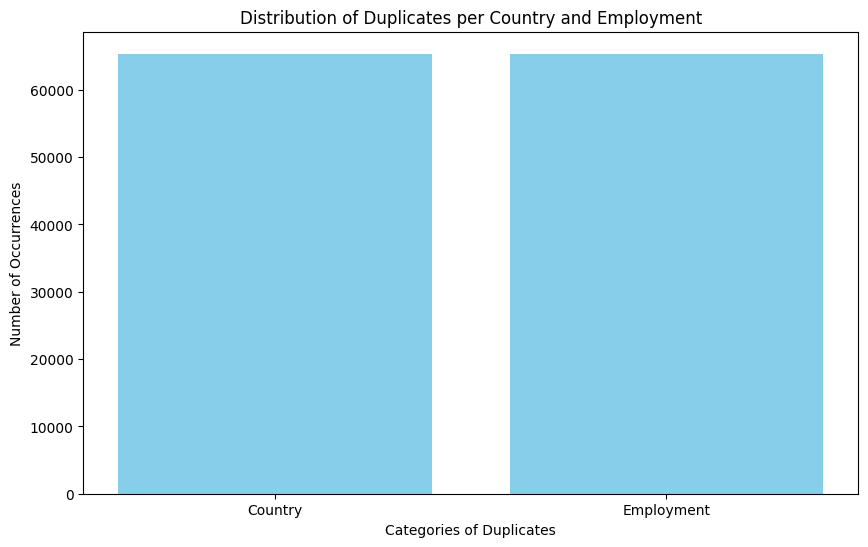

In [10]:
import matplotlib.pyplot as plt

duplicate_categories = ['Country', 'Employment']
duplicate_counts = [65271, 65347]

plt.figure(figsize=(10, 6))
plt.bar(duplicate_categories, duplicate_counts, color='skyblue')
plt.xlabel('Categories of Duplicates')
plt.ylabel('Number of Occurrences')
plt.title("Distribution of Duplicates per Country and Employment")
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [11]:
print('There are', df.duplicated().sum(), 'duplicate rows.')

There are 20 duplicate rows.


In [12]:
df.drop_duplicates(inplace=True)
df.shape

(65437, 114)

## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
